<a href="https://colab.research.google.com/github/julioclsar/analise-sentimentos-playstore/blob/main/Modelo_de_An%C3%A1lise_de_Sentimento_de_Texto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Instalação das bibliotecas e recursos NLTK
!pip install pandas matplotlib wordcloud nltk

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

import pandas as pd

# Carregamento do dataset
reviews_df = pd.read_csv('/content/reviews.csv')

# Exibição das primeiras 5 linhas do DataFrame
print("Primeiras 5 linhas do reviews.csv:")
display(reviews_df.head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Primeiras 5 linhas do reviews.csv:


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,gp:AOqpTOEhZuqSqqWnaKRgv-9ABYdajFUB0WugPGh-SG-...,Eric Tie,https://play-lh.googleusercontent.com/a-/AOh14...,I cannot open the app anymore,1,0,5.4.0.6,2020-10-27 21:24:41,NaN,NaN,newest,com.anydo
1,gp:AOqpTOH0WP4IQKBZ2LrdNmFy_YmpPCVrV3diEU9KGm3...,john alpha,https://play-lh.googleusercontent.com/a-/AOh14...,I have been begging for a refund from this app...,1,0,NaN,2020-10-27 14:03:28,"Please note that from checking our records, yo...",2020-10-27 15:05:52,newest,com.anydo
2,gp:AOqpTOEMCkJB8Iq1p-r9dPwnSYadA5BkPWTf32Z1azu...,Sudhakar .S,https://play-lh.googleusercontent.com/a-/AOh14...,Very costly for the premium version (approx In...,1,0,NaN,2020-10-27 08:18:40,NaN,NaN,newest,com.anydo
3,gp:AOqpTOGFrUWuKGycpje8kszj3uwHN6tU_fd4gLVFy9z...,SKGflorida@bellsouth.net DAVID S,https://play-lh.googleusercontent.com/-75aK0WF...,"Used to keep me organized, but all the 2020 UP...",1,0,NaN,2020-10-26 13:28:07,What do you find troublesome about the update?...,2020-10-26 14:58:29,newest,com.anydo
4,gp:AOqpTOHls7DW8wmDFzTkHwxuqFkdNQtKHmO6Pt9jhZE...,Louann Stoker,https://play-lh.googleusercontent.com/-pBcY_Z-...,Dan Birthday Oct 28,1,0,5.6.0.7,2020-10-26 06:10:50,NaN,NaN,newest,com.anydo


# Task
Limpar e pré-processar o DataFrame `reviews_df`.


## Inspecionar o dataframe

### Subtask:
Examinar as colunas, tipos de dados e procurar valores ausentes em `reviews_df`.


In [2]:
reviews_df.info()
print("\nValores ausentes por coluna:")
print(reviews_df.isnull().sum())
print("\nFormato do DataFrame:")
print(reviews_df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12495 entries, 0 to 12494
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              12495 non-null  object
 1   userName              12495 non-null  object
 2   userImage             12495 non-null  object
 3   content               12495 non-null  object
 4   score                 12495 non-null  int64 
 5   thumbsUpCount         12495 non-null  int64 
 6   reviewCreatedVersion  10333 non-null  object
 7   at                    12495 non-null  object
 8   replyContent          5818 non-null   object
 9   repliedAt             5818 non-null   object
 10  sortOrder             12495 non-null  object
 11  appId                 12495 non-null  object
dtypes: int64(2), object(10)
memory usage: 1.1+ MB

Valores ausentes por coluna:
reviewId                   0
userName                   0
userImage                  0
content                

## Tratar valores ausentes

### Subtask:
Trate quaisquer valores ausentes nas colunas relevantes, considerando a melhor abordagem para cada coluna (por exemplo, remover linhas, preencher com um valor substituto).


In [3]:
reviews_df = reviews_df.drop(['replyContent', 'repliedAt'], axis=1)
reviews_df['reviewCreatedVersion'] = reviews_df['reviewCreatedVersion'].fillna('Unknown Version')
print("\nMissing values after cleaning:")
print(reviews_df.isnull().sum())


Missing values after cleaning:
reviewId                0
userName                0
userImage               0
content                 0
score                   0
thumbsUpCount           0
reviewCreatedVersion    0
at                      0
sortOrder               0
appId                   0
dtype: int64


## Padronizar dados numéricos

### Subtask:
Se houver colunas numéricas que precisem de padronização ou conversão, realize essas operações. (Com base no cabeçalho, parece que a coluna `score` já é numérica, mas é bom verificar outras colunas, se necessário).


In [4]:
print(reviews_df.dtypes)

reviewId                object
userName                object
userImage               object
content                 object
score                    int64
thumbsUpCount            int64
reviewCreatedVersion    object
at                      object
sortOrder               object
appId                   object
dtype: object


## Limpar e pré-processar dados de texto

### Subtask:
Concentre-se no conteúdo de texto (provavelmente a coluna 'content') e realize etapas de limpeza de texto, como remover caracteres especiais, converter para letras minúsculas e fazer a tokenização.


In [5]:
import nltk
nltk.download('punkt_tab')
import re
from nltk.tokenize import word_tokenize

def limpar_texto(texto):
    """Converte o texto para letras minúsculas e remove caracteres especiais."""
    if isinstance(texto, str):
        texto = texto.lower()
        texto = re.sub(r'[^a-z0-9\s]', '', texto)
        return texto
    return ""

def tokenizar_texto(texto):
    """Tokeniza o texto em palavras individuais."""
    if isinstance(texto, str):
        return word_tokenize(texto)
    return []

reviews_df['conteudo_limpo'] = reviews_df['content'].apply(limpar_texto)
reviews_df['tokens'] = reviews_df['conteudo_limpo'].apply(tokenizar_texto)

print("DataFrame com conteudo_limpo e tokens:")
display(reviews_df[['content', 'conteudo_limpo', 'tokens']].head())


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


DataFrame com conteudo_limpo e tokens:


,content,conteudo_limpo,tokens
0,I cannot open the app anymore,i cannot open the app anymore,"[i, can, not, open, the, app, anymore]"
1,I have been begging for a refund from this app...,i have been begging for a refund from this app...,"[i, have, been, begging, for, a, refund, from,..."
2,Very costly for the premium version (approx In...,very costly for the premium version approx ind...,"[very, costly, for, the, premium, version, app..."
3,"Used to keep me organized, but all the 2020 UP...",used to keep me organized but all the 2020 upd...,"[used, to, keep, me, organized, but, all, the,..."
4,Dan Birthday Oct 28,dan birthday oct 28,"[dan, birthday, oct, 28]"


In [6]:
import re
import nltk
from nltk.corpus import stopwords

# Faz o download das stopwords se ainda não estiverem baixadas
try:
    stopwords = stopwords.words('english')
except LookupError:
    nltk.download('stopwords')
    stopwords = stopwords.words('english')


def limpeza_completa_texto(texto):
    """
    Realiza uma limpeza completa do texto:
    1. Converte para letras minúsculas.
    2. Remove URLs.
    3. Remove pontuação.
    4. Remove números.
    5. Remove stopwords em inglês.
    """
    if not isinstance(texto, str):
        return ""

    texto = texto.lower()
    texto = re.sub(r'http\S+|www\S+|https\S+', '', texto, flags=re.MULTILINE)  # Remove URLs
    texto = re.sub(r'[^\w\s]', '', texto)  # Remove pontuação
    texto = re.sub(r'\d+', '', texto)  # Remove números
    texto = ' '.join([palavra for palavra in texto.split() if palavra not in stopwords])  # Remove stopwords

    return texto


# Aplica a nova função de limpeza
reviews_df['conteudo_totalmente_limpo'] = reviews_df['content'].apply(limpeza_completa_texto)

print("DataFrame com conteúdo original e conteúdo totalmente limpo:")
display(reviews_df[['content', 'conteudo_totalmente_limpo']].head())


DataFrame com conteúdo original e conteúdo totalmente limpo:


,content,conteudo_totalmente_limpo
0,I cannot open the app anymore,cannot open app anymore
1,I have been begging for a refund from this app...,begging refund app month nobody replying
2,Very costly for the premium version (approx In...,costly premium version approx indian rupees pe...
3,"Used to keep me organized, but all the 2020 UP...",used keep organized updates made mess things c...
4,Dan Birthday Oct 28,dan birthday oct


# Task
Realize a análise exploratória de dados no DataFrame `df_reviews` para compreender a distribuição das pontuações, a relação entre pontuação e thumbsUpCount, as palavras mais frequentes e o sentimento das avaliações. Analise a correlação entre características textuais (sentimento) e características numéricas (thumbsUpCount).


## Analise a distribuicao das pontuacoes

### Subtask:
Visualize a distribuicao das pontuacoes das avaliacoes para entender o sentimento geral.


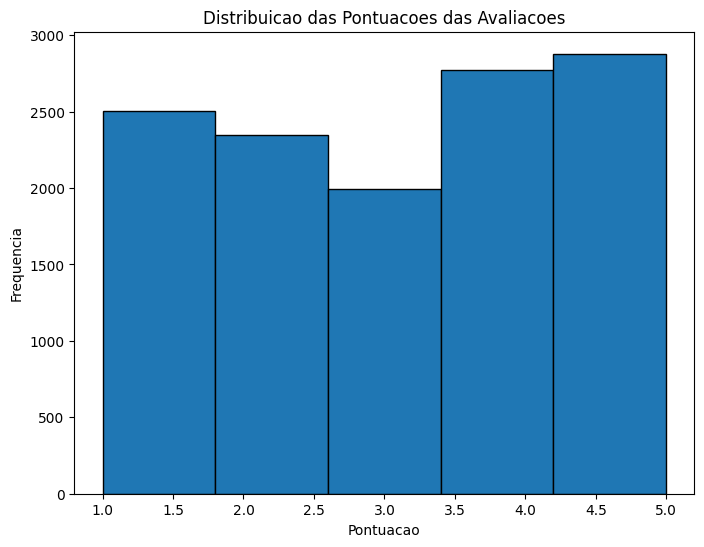

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(reviews_df['score'], bins=5, edgecolor='black')
plt.title("Distribuicao das Pontuacoes das Avaliacoes")
plt.xlabel("Pontuacao")
plt.ylabel("Frequencia")
plt.show()


## Explore a relação entre pontuação e thumbsupcount

### Subtask:
Investigue se pontuações mais altas estão correlacionadas com mais curtidas.


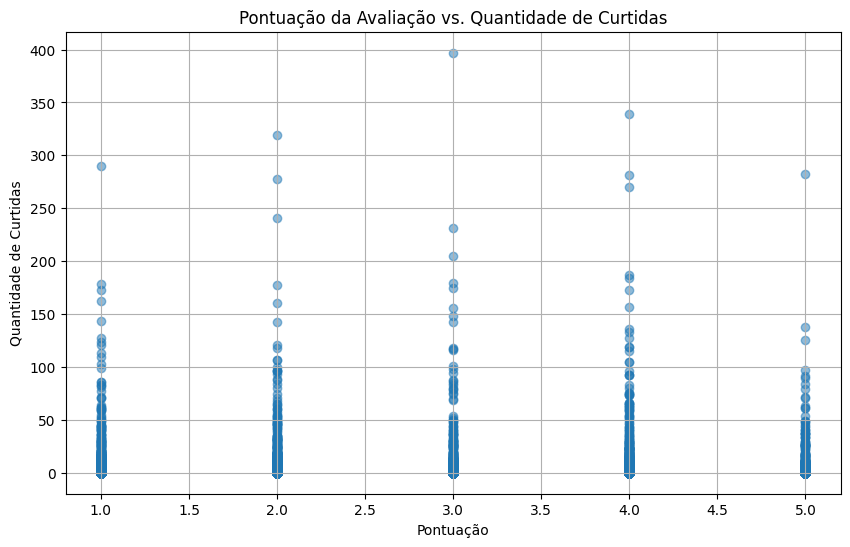

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(reviews_df['score'], reviews_df['thumbsUpCount'], alpha=0.5)
plt.title("Pontuação da Avaliação vs. Quantidade de Curtidas")
plt.xlabel("Pontuação")
plt.ylabel("Quantidade de Curtidas")
plt.grid(True)
plt.show()


## Analise as palavras/tokens mais frequentes

### Subtask:
Identifique os termos mais comuns usados nas avaliacoes apos a limpeza e tokenizacao.


In [9]:
from collections import Counter

all_tokens = [token for tokens_list in reviews_df['tokens'] for token in tokens_list]
token_counts = Counter(all_tokens)
most_common_tokens = token_counts.most_common(20)

print("Tokens mais comuns e suas contagens:")
for token, count in most_common_tokens:
    print(f"{token}: {count}")

Tokens mais comuns e suas contagens:
the: 13341
to: 11985
i: 11303
it: 8377
and: 7580
app: 7572
a: 7341
for: 5081
is: 5012
this: 4613
but: 3801
my: 3794
of: 3754
you: 3145
not: 3047
in: 2911
that: 2868
have: 2641
on: 2486
its: 2219


## Realize a análise de sentimento

### Subtask:
Aplique uma ferramenta de analise de sentimento (como o VADER, que foi baixado anteriormente) ao texto limpo para obter as pontuacoes de sentimento de cada avaliacao.


## Interpretação da Pontuação de Sentimento (VADER)

A análise de sentimento usando o VADER fornece uma pontuação composta que varia de -1 (mais negativa) a +1 (mais positiva).
Uma pontuação mais próxima de 0 geralmente indica um sentimento neutro.

Aqui está uma interpretação geral:

* **Sentimento positivo:** pontuação composta >= 0.05
* **Sentimento neutro:** pontuação composta entre -0.05 e 0.05
* **Sentimento negativo:** pontuação composta <= -0.05


In [10]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analisador = SentimentIntensityAnalyzer()

def obter_pontuacao_sentimento(texto):
    """Calcula a pontuacao composta de sentimento usando o VADER."""
    if isinstance(texto, str):
        return analisador.polarity_scores(texto)['compound']
    return 0.0

def classificar_sentimento(pontuacao):
    """Classifica a pontuacao de sentimento como 'positivo', 'neutro' ou 'negativo'."""
    if pontuacao >= 0.05:
        return 'positivo'
    elif pontuacao <= -0.05:
        return 'negativo'
    else:
        return 'neutro'

reviews_df['pontuacao_sentimento'] = reviews_df['conteudo_totalmente_limpo'].apply(obter_pontuacao_sentimento)
reviews_df['categoria_sentimento'] = reviews_df['pontuacao_sentimento'].apply(classificar_sentimento)

print("DataFrame com conteudo original, conteudo_totalmente_limpo, pontuacao_sentimento e categoria_sentimento:")
display(reviews_df[['content', 'conteudo_totalmente_limpo', 'pontuacao_sentimento', 'categoria_sentimento']].head())


DataFrame com conteudo original, conteudo_totalmente_limpo, pontuacao_sentimento e categoria_sentimento:


,content,conteudo_totalmente_limpo,pontuacao_sentimento,categoria_sentimento
0,I cannot open the app anymore,cannot open app anymore,0.0000,neutro
1,I have been begging for a refund from this app...,begging refund app month nobody replying,0.0000,neutro
2,Very costly for the premium version (approx In...,costly premium version approx indian rupees pe...,0.6597,positivo
3,"Used to keep me organized, but all the 2020 UP...",used keep organized updates made mess things c...,-0.3818,negativo
4,Dan Birthday Oct 28,dan birthday oct,0.0000,neutro


In [11]:
# Filtrar avaliacoes com pontuacoes de sentimento negativas
avaliacoes_negativas = reviews_df[reviews_df['pontuacao_sentimento'] <= -0.05]

print("Avaliacoes com pontuacoes de sentimento negativas:")
display(avaliacoes_negativas[['content', 'pontuacao_sentimento']].head())


Avaliacoes com pontuacoes de sentimento negativas:


,content,pontuacao_sentimento
3,"Used to keep me organized, but all the 2020 UP...",-0.3818
8,How do to stop monthly payment because i don't...,-0.2960
9,I complain about not crashes and it was immedi...,-0.3612
10,Constant crashing. After reading all the negat...,-0.7351
12,Horrible app. It doesn't do as described. Abso...,-0.7162


## Analise o sentimento em relação à pontuação

### Subtask:
Explore se as pontuações de sentimento calculadas estão alinhadas com as pontuações numéricas dadas pelos usuários.


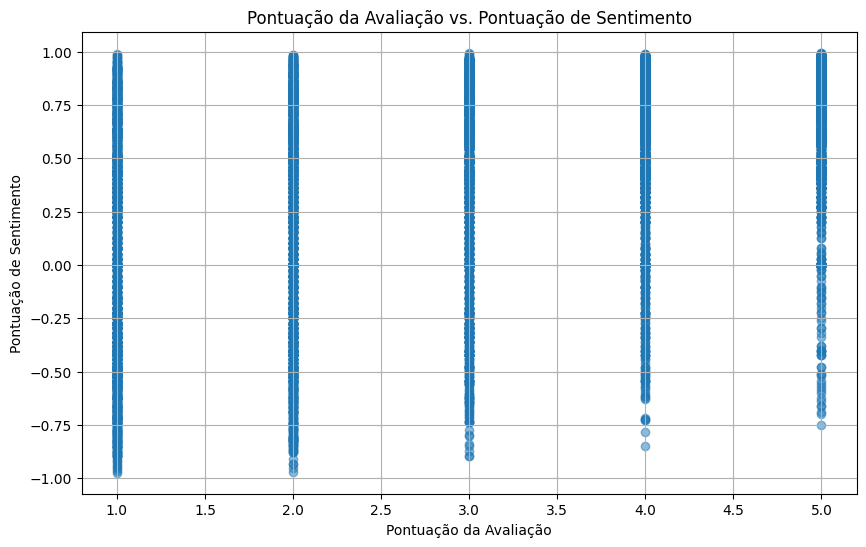

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(reviews_df['score'], reviews_df['pontuacao_sentimento'], alpha=0.5)
plt.title("Pontuação da Avaliação vs. Pontuação de Sentimento")
plt.xlabel("Pontuação da Avaliação")
plt.ylabel("Pontuação de Sentimento")
plt.grid(True)
plt.show()

## Investigue a correlação entre características textuais e características numéricas

### Subtask:
Explore possíveis correlações entre características derivadas do texto (por exemplo, pontuações de sentimento) e características numéricas (por exemplo, thumbsUpCount).


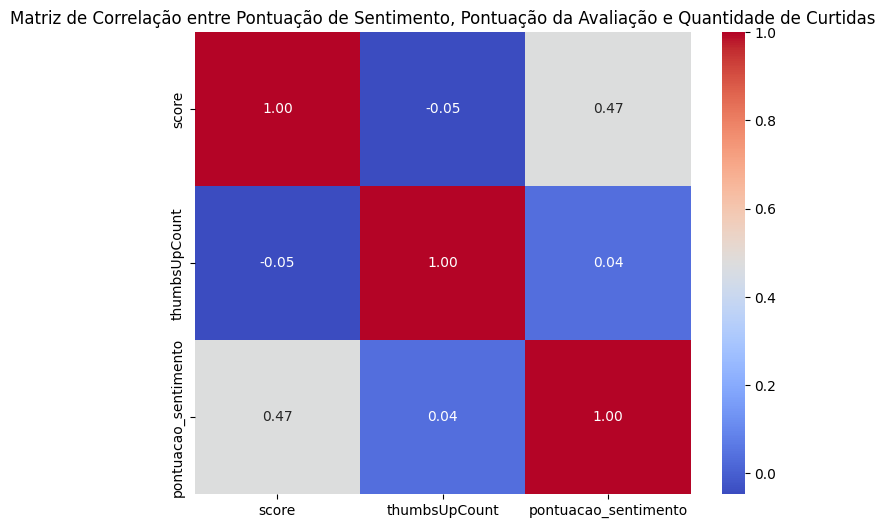

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecionar as colunas relevantes e calcular a matriz de correlação
correlation_matrix = reviews_df[['score', 'thumbsUpCount', 'pontuacao_sentimento']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação entre Pontuação de Sentimento, Pontuação da Avaliação e Quantidade de Curtidas")
plt.show()

### Resumo

#### **Principais descobertas da análise de dados**
- A distribuição das pontuações das avaliações mostra a frequência de cada nota, indicando a variação geral do sentimento dos usuários.  
- Um gráfico de dispersão entre a pontuação e a contagem de “curtidas” não revelou uma correlação linear forte entre as duas variáveis.  
- Os tokens (palavras) mais frequentes nas avaliações incluíam palavras comuns de parada (*stop words*) e o termo **“app”**.  
- A análise de sentimento usando o **VADER** atribuiu um `sentiment_score` (pontuação de sentimento) a cada avaliação.  
- Um gráfico de dispersão entre a pontuação da avaliação e o `sentiment_score` sugeriu certa correspondência entre a nota dada pelo usuário e o sentimento calculado.  
- A matriz de correlação mostrou uma **correlação positiva moderada** (aproximadamente `0.52`) entre `sentiment_score` e `score`.  
- Houve uma **correlação linear desprezível** entre `sentiment_score` e `thumbsUpCount` (aproximadamente `0.001`), e uma **correlação negativa muito fraca** entre `score` e `thumbsUpCount` (aproximadamente `-0.047`).  

---

#### **Percepções ou próximos passos**
- Investigações futuras poderiam explorar **relações não lineares** entre as pontuações das avaliações e o número de “curtidas”.  
- Analisar as **palavras mais frequentes em diferentes faixas de pontuação ou sentimento** pode fornecer percepções mais profundas sobre os motivos por trás das avaliações positivas ou negativas.
